In [1]:
cd /Users/kunalsharma/Documents/kunalsharma/documents/Data science

/Users/kunalsharma/Documents/kunalsharma/documents/Data science


In [2]:
import pandas as pd
df = pd.read_csv('loan_timing.csv')
cp = df.copy()

In [3]:
cp.describe()

,days since origination,days from origination to chargeoff
count,50000.000000,3305.000000
mean,365.844760,214.852345
std,210.965114,165.233874
min,0.000000,0.000000
25%,183.000000,76.000000
50%,366.000000,180.000000
75%,549.000000,323.000000
max,730.000000,725.000000


In [4]:
import numpy as np
def classlabel():
    a = []
    for i in range(cp.shape[0]):
        a.append(1) if np.isnan(cp.loc[i,'days from origination to chargeoff']) else a.append(0) 
    return a

In [5]:
cp['Class_label'] = classlabel()

In [6]:
training = cp[cp['Class_label']== 0]

In [7]:
training.describe()

,days since origination,days from origination to chargeoff,Class_label
count,3305.000000,3305.000000,3305.0
mean,474.198790,214.852345,0.0
std,176.942232,165.233874,0.0
min,10.000000,0.000000,0.0
25%,343.000000,76.000000,0.0
50%,501.000000,180.000000,0.0
75%,625.000000,323.000000,0.0
max,730.000000,725.000000,0.0


In [8]:
training.head(10)

,days since origination,days from origination to chargeoff,Class_label
14,327,78.0,0
15,400,390.0,0
16,721,362.0,0
26,410,48.0,0
61,649,412.0,0
67,653,357.0,0
75,182,109.0,0
82,128,5.0,0
87,728,497.0,0
97,553,189.0,0


In [10]:
x = training['days since origination']
y = training['days from origination to chargeoff']

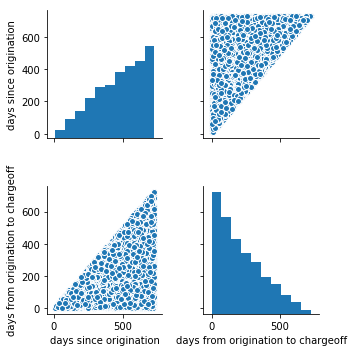

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 
cols = ['days since origination','days from origination to chargeoff']
sns.pairplot(training[cols], size=2.5)
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [20]:
x.describe()

,days since origination
count,3305.000000
mean,474.198790
std,176.942232
min,10.000000
25%,343.000000
50%,501.000000
75%,625.000000
max,730.000000


In [21]:
y.describe()

,days from origination to chargeoff
count,3305.000000
mean,214.852345
std,165.233874
min,0.000000
25%,76.000000
50%,180.000000
75%,323.000000
max,725.000000


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=1)

In [23]:
x_train.describe()

,days since origination
count,2313.000000
mean,474.715521
std,177.355822
min,10.000000
25%,345.000000
50%,502.000000
75%,626.000000
max,730.000000


In [24]:
y_test.describe()

,days from origination to chargeoff
count,992.000000
mean,207.196573
std,165.344665
min,0.000000
25%,70.000000
50%,163.000000
75%,312.250000
max,700.000000


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
alphas = [0.0001, 0.001, 0.01, 1, 5, 10, 20, 100,500,1000,5000,10000]
tuning = [{'alpha':alphas}]
ridge = Ridge()
gso = GridSearchCV(ridge,param_grid=tuning,cv=10,scoring='neg_mean_squared_error')
gso.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.0001, 0.001, 0.01, 1, 5, 10, 20, 100, 500, 1000, 5000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [26]:
gso.best_estimator_

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
print('best training scor', np.sqrt(-gso.best_score_))

best training scor 147.12553838649157


In [28]:
best_ridge = gso.best_estimator_
best_ridge.fit(x_train,y_train)
print("Training accuracy", best_ridge.score(x_train, y_train))
print("Test accuracy", best_ridge.score(x_test,y_test)) 

Training accuracy 0.20716487463173994
Test accuracy 0.2149598795754759


In [30]:
ridge_pred = best_ridge.predict(x_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse_ridge = mean_squared_error(y_test,ridge_pred)
print("Test mse for ridge", np.sqrt(mse_ridge))

Test mse for ridge 146.42563130704568


In [31]:
from sklearn.metrics import r2_score
train_pred= best_ridge.predict(x_train)
print("Ridge R2 score training", r2_score(y_train,train_pred))
print("Ridge R2 score test:", r2_score(y_test,ridge_pred))

Ridge R2 score training 0.20716487463173994
Ridge R2 score test: 0.2149598795754759


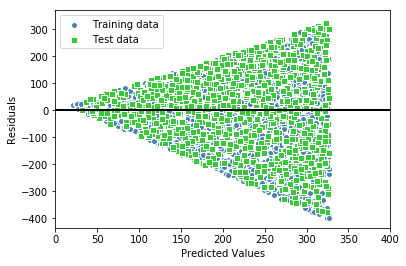

In [37]:
import matplotlib.pyplot as plt
plt.scatter(train_pred, train_pred - y_train, c='steelblue',marker='o', edgecolor='white',label='Training data')
#plt.axis('equal')
plt.scatter(ridge_pred, ridge_pred - y_test,c='limegreen',marker='s',edgecolor='white',label='Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin =0,xmax=400,color='black',lw=2)
plt.xlim([0,400])
plt.show()

In [38]:
train_pred.mean()

218.13575443147428

In [39]:
ridge_pred.mean()

217.40636486846537

In [41]:
print("Train SD {}, Test SD {}" .format(train_pred.std(),ridge_pred.std()))

Train SD 75.12536065883178, Test SD 74.55388514251533


In [43]:
predict = cp[cp['Class_label']== 1]

In [44]:
predict.describe()

,days since origination,days from origination to chargeoff,Class_label
count,46695.000000,0.0,46695.0
mean,358.175629,NaN,1.0
std,211.071714,NaN,0.0
min,0.000000,NaN,1.0
25%,174.000000,NaN,1.0
50%,355.000000,NaN,1.0
75%,540.000000,NaN,1.0
max,730.000000,NaN,1.0


In [45]:
pred = predict

In [46]:
pred.head(10)

,days since origination,days from origination to chargeoff,Class_label
0,109,NaN,1
1,679,NaN,1
2,723,NaN,1
3,509,NaN,1
4,254,NaN,1
5,158,NaN,1
6,302,NaN,1
7,143,NaN,1
8,354,NaN,1
9,438,NaN,1


In [49]:
pred_x= pred['days since origination']

In [50]:
pred_x.shape

(46695,)

In [51]:
pred_x= pd.DataFrame(pred['days since origination'])

In [52]:
pred_x.describe()

,days since origination
count,46695.000000
mean,358.175629
std,211.071714
min,0.000000
25%,174.000000
50%,355.000000
75%,540.000000
max,730.000000


In [53]:
pred_x.head(10)

,days since origination
0,109
1,679
2,723
3,509
4,254
5,158
6,302
7,143
8,354
9,438


In [54]:
default_values = best_ridge.predict(pred_x)

In [55]:
default_values.shape

(46695, 1)

In [61]:
default_values = pd.DataFrame(default_values)

In [62]:
default_values.describe()

,0
count,46695.000000
mean,168.760468
std,89.426258
min,17.009645
25%,90.729466
50%,167.415026
75%,245.795295
max,326.293950


In [77]:
pred_x['days from origination to chargeoff'] = default_values[:]

In [78]:
pred_x.head(10)

,days since origination,days from origination to chargeoff
0,109,63.190452
1,679,304.686416
2,723,323.328210
3,509,232.661304
4,254,124.623636
5,158,83.950632
6,302,144.960138
7,143,77.595475
8,354,166.991349
9,438,202.580228


In [79]:
predicted = pred_x

In [80]:
predicted.describe()

,days since origination,days from origination to chargeoff
count,46695.000000,43598.000000
mean,358.175629,168.717271
std,211.071714,89.445159
min,0.000000,17.009645
25%,174.000000,90.729466
50%,355.000000,167.415026
75%,540.000000,245.795295
max,730.000000,326.293950


In [84]:
print("coeff:", best_ridge.coef_[0])

coeff: [0.42367713]


In [85]:
print("intercept", best_ridge.intercept_)

intercept [17.00964512]


In [87]:
import statsmodels.api as sm
from scipy import stats
## Fit and summary:
model = sm.OLS(y_train,x_train).fit()
print(model.summary())

                                    OLS Regression Results                                    
Dep. Variable:     days from origination to chargeoff   R-squared:                       0.711
Model:                                            OLS   Adj. R-squared:                  0.711
Method:                                 Least Squares   F-statistic:                     5683.
Date:                                Mon, 07 Jan 2019   Prob (F-statistic):               0.00
Time:                                        04:31:20   Log-Likelihood:                -14827.
No. Observations:                                2313   AIC:                         2.966e+04
Df Residuals:                                    2312   BIC:                         2.966e+04
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                             coef    std err      

In [91]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
w=(x_train)**2
mod_wls = sm.WLS(y_train, x_train, weights=1./w)
res_wls = mod_wls.fit()
print(res_wls.summary())

                                    WLS Regression Results                                    
Dep. Variable:     days from origination to chargeoff   R-squared:                       0.720
Model:                                            WLS   Adj. R-squared:                  0.720
Method:                                 Least Squares   F-statistic:                     5955.
Date:                                Mon, 07 Jan 2019   Prob (F-statistic):               0.00
Time:                                        05:17:54   Log-Likelihood:                -14425.
No. Observations:                                2313   AIC:                         2.885e+04
Df Residuals:                                    2312   BIC:                         2.886e+04
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                             coef    std err      

In [96]:
predy = res_wls.predict(x_test)

In [97]:
predy.shape

(992,)

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
wols = mean_squared_error(y_test,predy)
print("Test mse for WOLS", np.sqrt(wols))

Test mse for WOLS 146.29129845192918


In [101]:
print("WOLS R2 test",r2_score(y_test,predy))

WOLS R2 test 0.21639963170253051


In [119]:
import statsmodels.stats.api as sms
test = sms.jarque_bera(res_wls.resid)
print("Jarque-Bera:", test)

Jarque-Bera: (36.1872275544376, 1.3868943498549878e-08, 0.1642013383419622, 2.4826652569777616)


In [121]:
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(res_wls.resid, res_wls.model.exog)
lzip(name, test)

[('F statistic', 0.9313815044918732), ('p-value', 0.8864383924922831)]